In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv(r'C:\Users\HP\Desktop\PythonProjects on Juypter Notebook\python libraries\Projects\Python_Amazon_Sales_Analysis-main\Amazon Sale Report.csv')

In [11]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [12]:
df.shape

(128976, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [14]:
df.drop(['New','PendingS'],axis=1,inplace=True)

In [15]:
df.shape

(128976, 19)

In [16]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(37514, 19)

In [19]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

# EDA:

In [20]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [21]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

In [22]:
#Renaming of data inside the column:(Status):

df['Status'] = df['Status'].replace(['Shipped - Deliverd to Buyer'],'Deliverd')
df['Status'] = df['Status'].replace(['Shipped - Returned to Seller'],'Returned')
df['Status'] = df['Status'].replace(['Shipped - Rejected by Buyer'],'Undeliverd')
df['Status'] = df['Status'].replace(['Shipped - Lost in Transit'],'Lost')
df['Status'] = df['Status'].replace(['Shipped - Out for Delivery'],'Out for delivery')
df['Status'] = df['Status'].replace(['Shipped - Returning to Seller'],'Returned')
df['Status'] = df['Status'].replace(['Shipped - Picked Up'], 'Dispatched')
df['Status'] = df['Status'].replace(['Pending - Waiting for Pick Up'],'In transit')
df['Status'] = df['Status'].replace(['Shipped - Damaged'], 'Damaged')



In [23]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Returned',
       'Undeliverd', 'Lost', 'Out for delivery', 'Dispatched', 'Pending',
       'In transit', 'Damaged'], dtype=object)

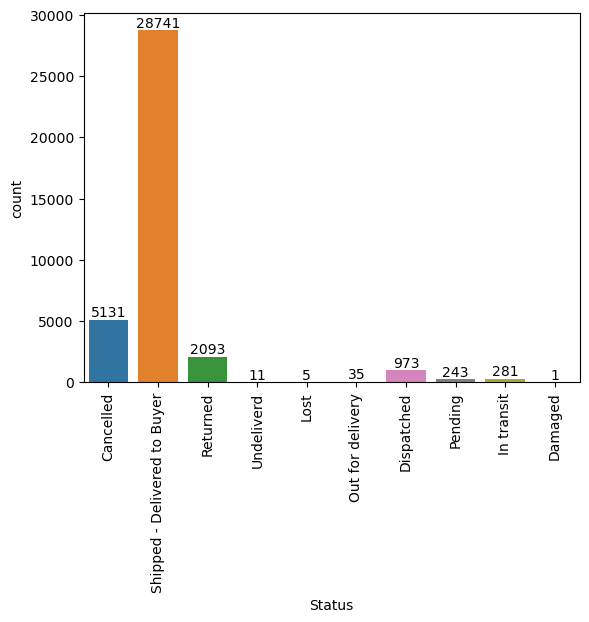

In [24]:
ax=sns.countplot(data=df,x='Status')
# plt.figure(figsize=(20,5))
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

# Observation:
By above graph we can observe that majority of the orders are deliverd to the customers. 

In [25]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship


In [26]:
df['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Socks', 'Trousers', 'Wallet',
       'Perfume', 'Shoes'], dtype=object)

In [27]:
df['Category']=df['Category'].astype(str)

In [28]:
df['Category'].describe()

count       37514
unique          8
top       T-shirt
freq        14062
Name: Category, dtype: object

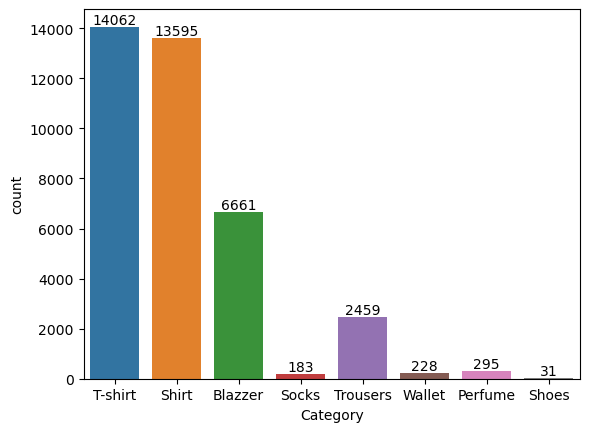

In [29]:
ax=sns.countplot(x='Category',data=df)
ax.bar_label(ax.containers[0])
plt.show()

# Observations:
Tshirts are the most selling items followed by Shirts and Blazzers.
 

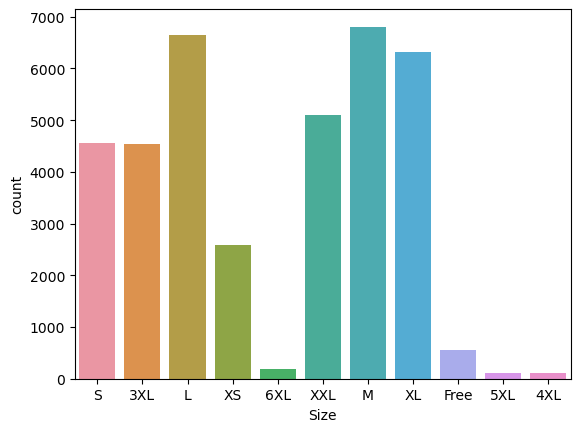

In [30]:
sns.countplot(x='Size',data=df)
plt.show()

# Observations:
Size:M,L,XL are top seling sizes.

# Distribution of states based orders:

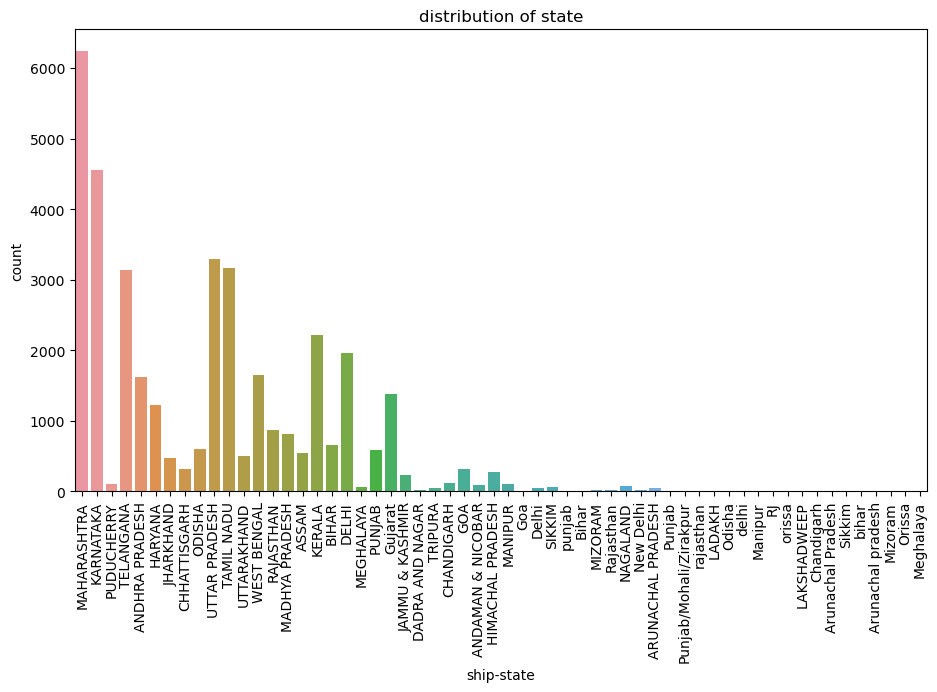

In [31]:
plt.figure(figsize=(11,6))
sns.countplot(data=df,x='ship-state')
plt.xlabel('ship-state')
# plt.ylabe('count')
plt.title('distribution of state')
plt.xticks(rotation=90)
plt.show()


# States with Maximum no of Orders:

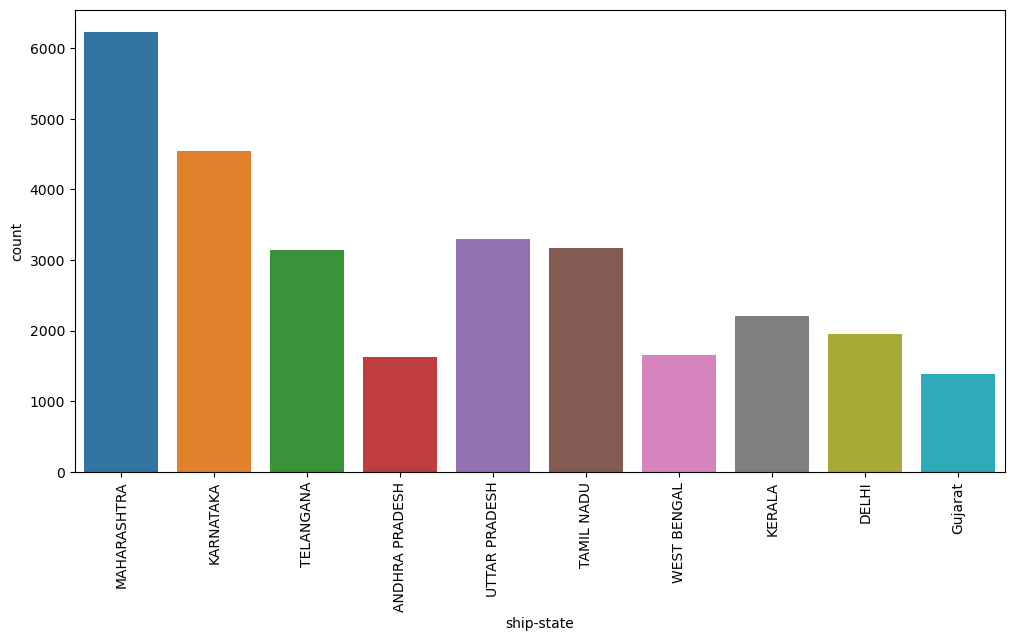

In [32]:
top_10=df['ship-state'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['ship-state'].isin(top_10.index)],x='ship-state')
plt.xticks(rotation=90)
plt.show()


# Sates with Maximum Amount Generated:

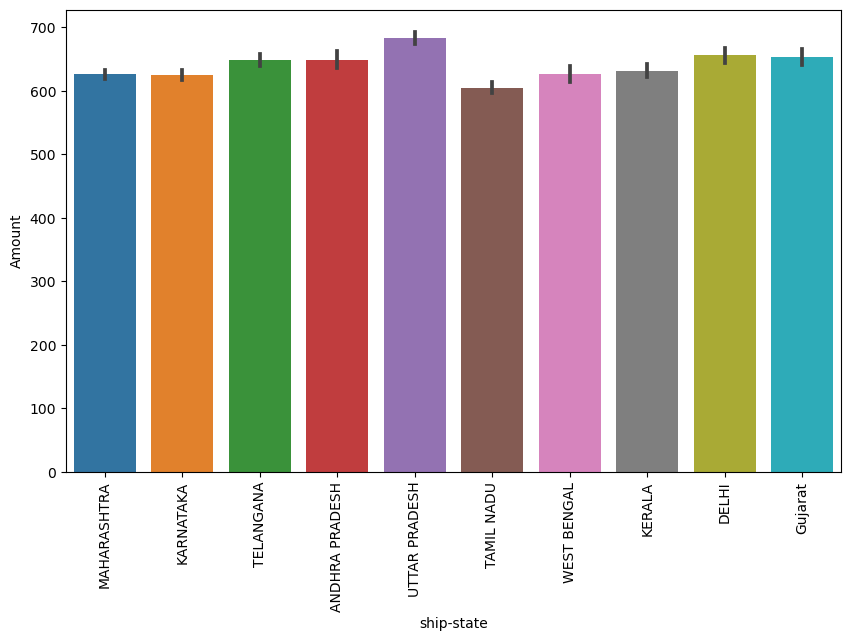

In [33]:
df2=df.groupby(['ship-state'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)
plt.figure(figsize=(10,6))
top_10=df['ship-state'].value_counts().head(10)
sns.barplot(data=df[df['ship-state'].isin(top_10.index)],x='ship-state',y='Amount')
plt.xticks(rotation=90)
plt.show()

# Cities with maximux  no orders:

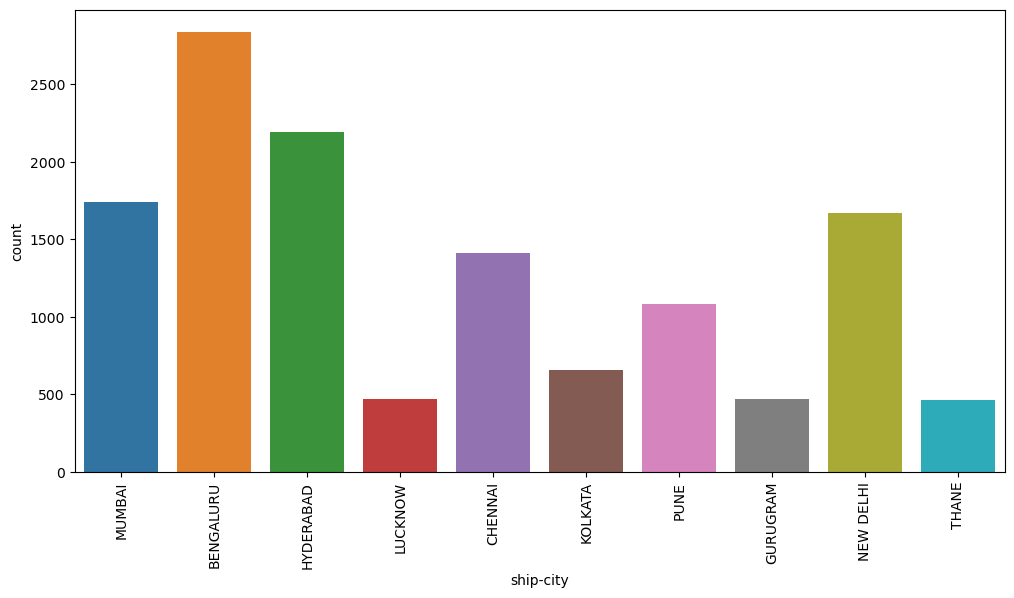

In [34]:
top_10=df['ship-city'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['ship-city'].isin(top_10.index)],x='ship-city')
plt.xticks(rotation=90)
plt.show()

# Cities with maximum amount generated through orders.

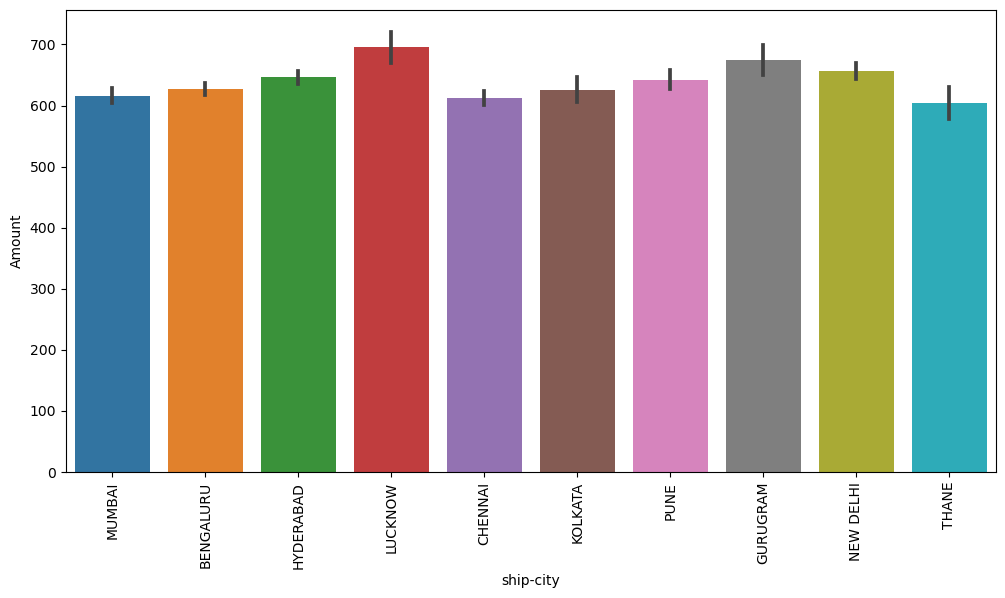

In [35]:
df2=df.groupby(['ship-city'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=True)
plt.figure(figsize=(12,6))
top_10=df['ship-city'].value_counts().head(10)
sns.barplot(data=df[df['ship-city'].isin(top_10.index)],x='ship-city',y='Amount')
plt.xticks(rotation=90)
plt.show()

# Analysis Report:
The Data analysis reveals that buissness has significant customer base in Maharashtra,Uttarpradesh,Karnataka and 
experinces high demand in tshirts with m and l sizes are most prefferd sizes among the customers.